# Pandas

Es una libreria de computo y analisis de datos que proporciona herramientas poderosas para manejo de datos y estructuras en DataFrames, posee la licencia BSD-License.

Posee dos estructuras de datos fundamentales, Series y DataFrames. Las Series son similares a un Array de una dimension, y un DataFrame se corresponde con una tabla 2D

* Series: Array de una dimesion
* DataFrame: Se corresponde con una tabla 2D
* Panel: Similar a un diccionario de DataFrames

In [1]:
import pandas as pd

## Series 

Podemos generar series en base a una lista de python y tendra la siguiente estructura

In [2]:
serie = pd.Series([x**2 for x in range(11)])
serie

0       0
1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64

Tambien podemos crear una serie en base a un diccionario de Python

In [3]:
temperaturas = {"Mexico": 20, "Colombia": 25, "USA": 30}
temp = pd.Series(temperaturas)
temp

Mexico      20
Colombia    25
USA         30
dtype: int64

Podemos crear igualmente una serie en base a asignarle a todos los elementos un valor en especifico, supongamos que creamos 
un DataFrame para las ventas de una empresa en el 2024 por lo cual que iniciaremos todas las ventas con $0

In [4]:
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
ventas = pd.Series(0.0, meses)
ventas

Enero         0.0
Febrero       0.0
Marzo         0.0
Abril         0.0
Mayo          0.0
Junio         0.0
Julio         0.0
Agosto        0.0
Septiembre    0.0
Octubre       0.0
Noviembre     0.0
Diciembre     0.0
dtype: float64

## Accediendo a los elementos de una serie

Podemos acceder por la posicion, usando los indices de manera similar a un array, ademas tabien podemos acceder mediante la clave que le asignamos con el diccionario

In [5]:
# Usamos el metodo iloc para acceder a una posicion especifica
print(f'Enero: {ventas.iloc[0]}')

# Usamos la llave de acceso para optener el valor 
print(f'Enero: {ventas["Enero"]}')

Enero: 0.0
Enero: 0.0


In [6]:
# Tambien podemos acceder mediante el metodo loc
print(f'Julio: {ventas.loc["Julio"]}')

Julio: 0.0


### Segmentacion y acceso

Se puede usar segmentacion de listas para acceder a ciertos valores de la serie.
[Inicio, Final-1] podemos verlo en cuestion de intervalos como un intervalo cerrado abierto
Por ejemplo ventas[2:5] lo podemos interpretar como 
[2,5) = {2,3,4}

Ya que en el segundo argumento se toma como un intervalo abierto, entonces se toma como n-1


In [7]:
# Accediendo de la posicion 2 -> 4 de la Serie
ventas.iloc[2:5]

Marzo    0.0
Abril    0.0
Mayo     0.0
dtype: float64

### Operaciones aritmeticas con Series

Las series de pandas son compatibles y similares a los arrays de numpy, por lo que podemos manipularlos con dicha libreria

In [8]:
import numpy as np

sumaVentas = np.sum(ventas)
sumaVentas

0.0

In [9]:
ventaAleatoria = np.random.randint(low=0, high=1500, size=12)
ventaAleatoria

array([ 687,  703, 1092, 1447, 1103, 1267,  718,  993,  541, 1100,  354,
        282])

In [10]:
ventas += ventaAleatoria
ventas

Enero          687.0
Febrero        703.0
Marzo         1092.0
Abril         1447.0
Mayo          1103.0
Junio         1267.0
Julio          718.0
Agosto         993.0
Septiembre     541.0
Octubre       1100.0
Noviembre      354.0
Diciembre      282.0
dtype: float64

In [11]:
# Obtenemos la suma de las ventas totales del año

sumaVentas = np.sum(ventas)
print(f'Suma anual 2024: ${sumaVentas}')

Suma anual 2024: $10287.0


In [12]:
ventas = pd.Series(ventas, name="Ventas 2024")
ventas

Enero          687.0
Febrero        703.0
Marzo         1092.0
Abril         1447.0
Mayo          1103.0
Junio         1267.0
Julio          718.0
Agosto         993.0
Septiembre     541.0
Octubre       1100.0
Noviembre      354.0
Diciembre      282.0
Name: Ventas 2024, dtype: float64

## Representacion grafica de las ventas en el 2024

En base a nuestro ejemplo de ventas, podemos realizar analisis graficos de dichos comportamientos, para asi generar reportes mas atractivos y entendibles, no solo para compañeros de area si no para ejecutivos.

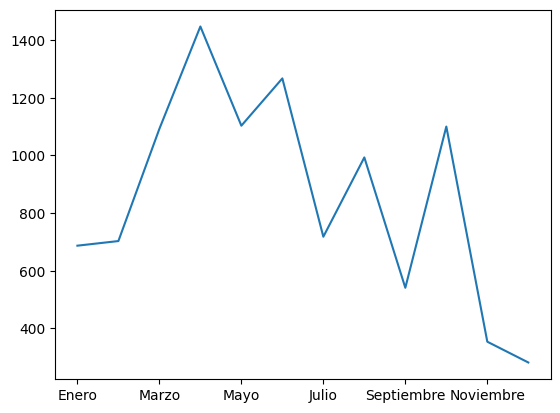

In [13]:
import matplotlib.pyplot as plt

ventas.plot()
plt.show()

# Creacion de un objeto DataFrame

Los DataFrames son el tipo de dato principal y el mas utilizado en pandas para analisis de datos, y podemos generarlo en base a una serie compleja de datos, tanto archivos de excel, csv y demas formatos

In [14]:
balance = {
    "Ingresos": pd.Series( np.random.randint(low=0, high=1500, size=12), meses), 
    "Egresos": pd.Series( np.random.randint(low=0, high=1500, size=12), meses)
}

df = pd.DataFrame(balance)
df

,Ingresos,Egresos
Enero,303,690
Febrero,1055,89
Marzo,972,773
Abril,173,947
Mayo,1287,497
Junio,1179,304
Julio,389,1059
Agosto,153,1166
Septiembre,1103,1197
Octubre,964,188


In [15]:
# Accederemos a los valores de las columnas especificas de un DataFrame
df["Ingresos"]

Enero          303
Febrero       1055
Marzo          972
Abril          173
Mayo          1287
Junio         1179
Julio          389
Agosto         153
Septiembre    1103
Octubre        964
Noviembre     1022
Diciembre      766
Name: Ingresos, dtype: int32

In [16]:
# Accediendo a multiples columnas, en este caso son solo 2, sin embargo funciona para n-columnas
# Debemos de pasar un array con la lista de las columnas que deseamos acceder
df[["Ingresos", "Egresos"]]

,Ingresos,Egresos
Enero,303,690
Febrero,1055,89
Marzo,972,773
Abril,173,947
Mayo,1287,497
Junio,1179,304
Julio,389,1059
Agosto,153,1166
Septiembre,1103,1197
Octubre,964,188


### Expresiones booleanas y filtracion de datos

Podemos filtrar datos en base a condicionales, y pandas se encarga de retornar si la entrada cumple o no la condicion


In [17]:
df["Ingresos"] > 1000

Enero         False
Febrero        True
Marzo         False
Abril         False
Mayo           True
Junio          True
Julio         False
Agosto        False
Septiembre     True
Octubre       False
Noviembre      True
Diciembre     False
Name: Ingresos, dtype: bool

Podemos combinar expresiones para acceder solo a los elementos que cumplan la condicion

In [18]:
df[df["Ingresos"] > 1000]

,Ingresos,Egresos
Febrero,1055,89
Mayo,1287,497
Junio,1179,304
Septiembre,1103,1197
Noviembre,1022,468


### Accediendo a los elementos de las filas del DataFrame

Accedemos a los elementos de una fila especifica de un DataFrame igual que lo hariamos a los elementos de una Serie

In [19]:
df

,Ingresos,Egresos
Enero,303,690
Febrero,1055,89
Marzo,972,773
Abril,173,947
Mayo,1287,497
Junio,1179,304
Julio,389,1059
Agosto,153,1166
Septiembre,1103,1197
Octubre,964,188


In [20]:
df.loc["Enero"]

Ingresos    303
Egresos     690
Name: Enero, dtype: int32

In [21]:
df.iloc[11]

Ingresos    766
Egresos     496
Name: Diciembre, dtype: int32

In [22]:
df.iloc[0:4]

,Ingresos,Egresos
Enero,303,690
Febrero,1055,89
Marzo,972,773
Abril,173,947


## Consulta avanzada mediante queries

In [23]:
df.query("Ingresos >= 800 and Egresos < 1000")

,Ingresos,Egresos
Febrero,1055,89
Marzo,972,773
Mayo,1287,497
Junio,1179,304
Octubre,964,188
Noviembre,1022,468


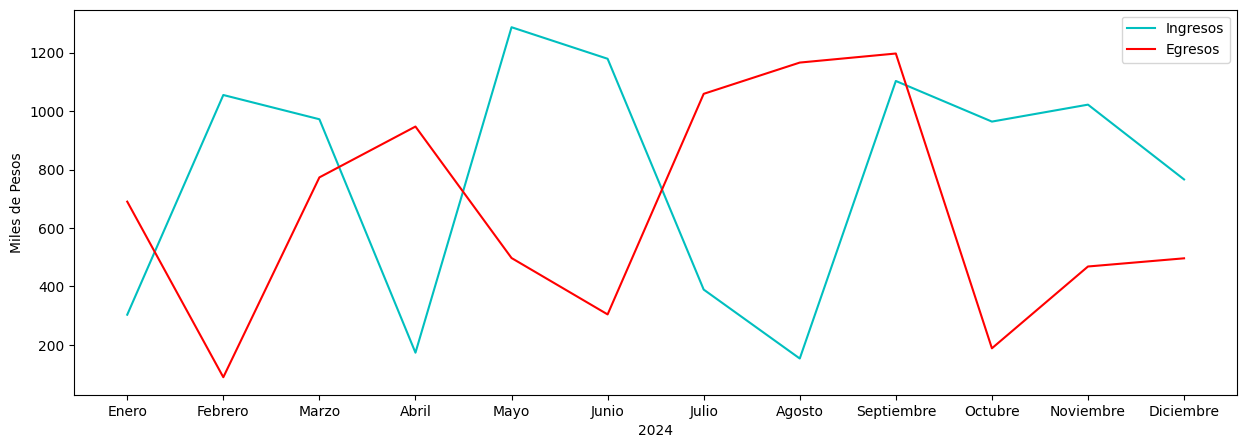

In [24]:
# Graficamos la relacion de ambos

plt.figure(figsize=(15,5))
plt.plot(df["Ingresos"], "c", label="Ingresos")
plt.ylabel("Miles de Pesos")
plt.xlabel("2024")
plt.plot(df["Egresos"], "r", label="Egresos")
plt.legend(loc="best")
plt.show()

Calculamos el balance total para analizar si hubo perdidas o ganancias en el año

Balance total: $1492


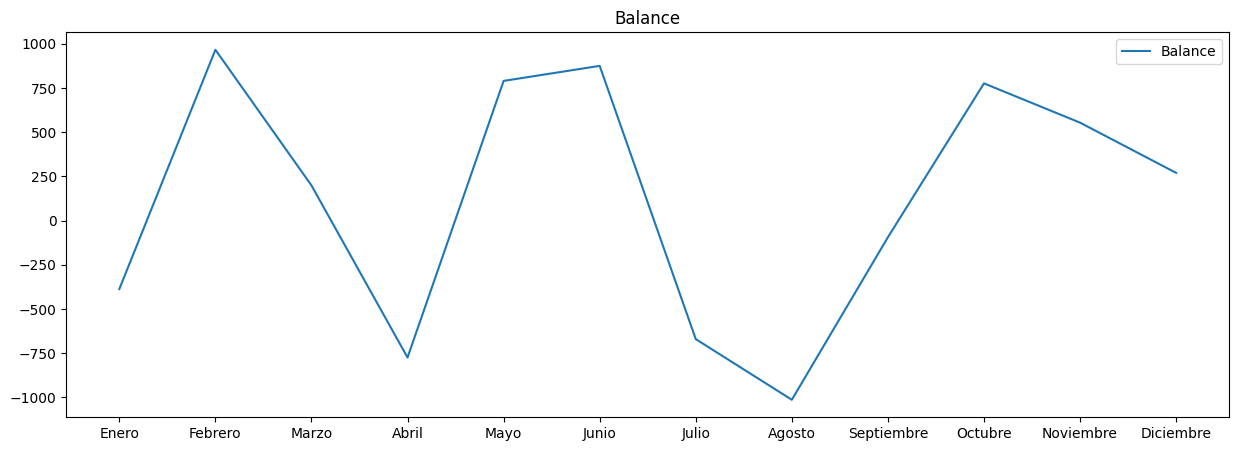

In [25]:
totalVentas = np.sum(df["Ingresos"])
totalGastos = np.sum(df["Egresos"])

print(f'Balance total: ${totalVentas - totalGastos}')

plt.figure(figsize=(15,5))
plt.title("Balance")
plt.plot((df["Ingresos"] - df["Egresos"]), label="Balance")
plt.legend(loc="best")
plt.show()

Podemos ver que hubo perdidas por $540 000 pesos

## Modificacion de un DataFrame

In [39]:
# Añadir una nueva columna a el dataframe

balances = df["Ingresos"] - df["Egresos"]
df["Balances"] = balances
print(type(df["Ingresos"]))
df

<class 'pandas.core.series.Series'>


,Ingresos,Egresos,Balances
Enero,303,690,-387
Febrero,1055,89,966
Marzo,972,773,199
Abril,173,947,-774
Mayo,1287,497,790
Junio,1179,304,875
Julio,389,1059,-670
Agosto,153,1166,-1013
Septiembre,1103,1197,-94
Octubre,964,188,776


In [33]:
# Añadiendo una nueva columna y retornando un nuevo DataFrame
df_mod = df.assign(Balances = [-354, 411, 501, -147, -329, -335, -351, 46, -46, 131, -102, 35])
df_mod

,Ingresos,Egresos,Balances
Enero,303,690,-354
Febrero,1055,89,411
Marzo,972,773,501
Abril,173,947,-147
Mayo,1287,497,-329
Junio,1179,304,-335
Julio,389,1059,-351
Agosto,153,1166,46
Septiembre,1103,1197,-46
Octubre,964,188,131


In [35]:
# Eliminar una columna existente del DataFrame
del df["Balances"]
df

,Ingresos,Egresos
Enero,303,690
Febrero,1055,89
Marzo,972,773
Abril,173,947
Mayo,1287,497
Junio,1179,304
Julio,389,1059
Agosto,153,1166
Septiembre,1103,1197
Octubre,964,188


In [38]:
# Borrando una columna y devolver una copia del DataFrame resultante

df_mod = df.drop(["Balances"], axis=1)
df_mod

,Ingresos,Egresos
Enero,303,690
Febrero,1055,89
Marzo,972,773
Abril,173,947
Mayo,1287,497
Junio,1179,304
Julio,389,1059
Agosto,153,1166
Septiembre,1103,1197
Octubre,964,188


In [40]:
df

,Ingresos,Egresos
Enero,64,878
Febrero,774,1421
Marzo,1457,1108
Abril,1428,946
Mayo,969,878
Junio,1051,148
Julio,1172,463
Agosto,518,1248
Septiembre,1302,992
Octubre,1215,372


### Evaluando expresiones sobre un DataFrame

In [40]:
df.eval("Balances + 100")

Enero         -287
Febrero       1066
Marzo          299
Abril         -674
Mayo           890
Junio          975
Julio         -570
Agosto        -913
Septiembre       6
Octubre        876
Noviembre      654
Diciembre      370
Name: Balances, dtype: int32

In [41]:
# Agregando un valor resultante como una nueva columna
df.eval("Impuestos = Ingresos * 0.33", inplace=True)
df

,Ingresos,Egresos,Balances,Impuestos
Enero,303,690,-387,99.99
Febrero,1055,89,966,348.15
Marzo,972,773,199,320.76
Abril,173,947,-774,57.09
Mayo,1287,497,790,424.71
Junio,1179,304,875,389.07
Julio,389,1059,-670,128.37
Agosto,153,1166,-1013,50.49
Septiembre,1103,1197,-94,363.99
Octubre,964,188,776,318.12


# Guardando un DataFrame

In [ ]:
df.to_csv("Balance_2024.csv")

In [ ]:
df.to_excel("Balance_2024.xlsx")

In [ ]:
df.to_json("Balance_2024.json")

## Leyendo un DataFrame

In [ ]:
# Cargamos el DataFrame con la primera columna correctamente asignada
df2 = pd.read_csv("Balance_2024.csv", index_col=0)
df2